In [42]:
import matplotlib.pyplot as plt
import pickle as pkl
import seaborn as sns
import pandas as pd

## 5 minutes left, down 3-1

Results calculated on slurm servers using the brute force model. 24 hour time limit was hit, so we stopped calculating after a pull time of 110 seconds

'Pull the goalie after 2 seconds for the highest probability of success'

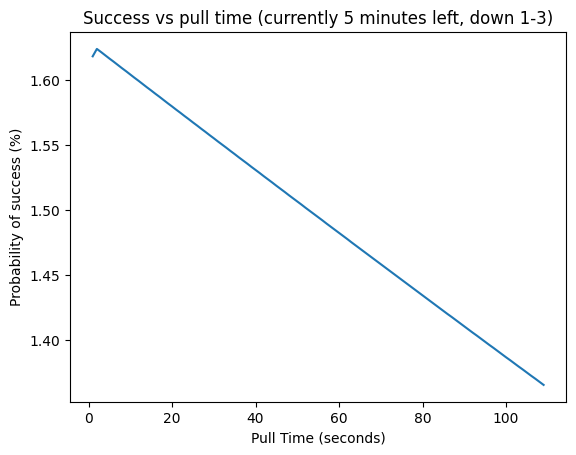

In [13]:
decisions_df = pkl.load(
    open(
        "results/partial_results_5min_1to3_brute_force.pkl",
        "rb",
    )
)

# Plot pull time vs probability of success
plt.plot(decisions_df["pull_time"], decisions_df["prob_success"])
# label x axis
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Probability of success (%)")
plt.title("Success vs pull time (currently 5 minutes left, down 1-3)")

# Find the pull time with the highest probability
max_prob = decisions_df["prob_success"].max()
best_pull_times = decisions_df[decisions_df["prob_success"] == max_prob]["pull_time"].values[0]
display(f"Pull the goalie after {best_pull_times} seconds for the highest probability of success")

Text(0.5, 1.0, 'Compute time vs pull time considered (currently 5 minutes left, down 1-3)')

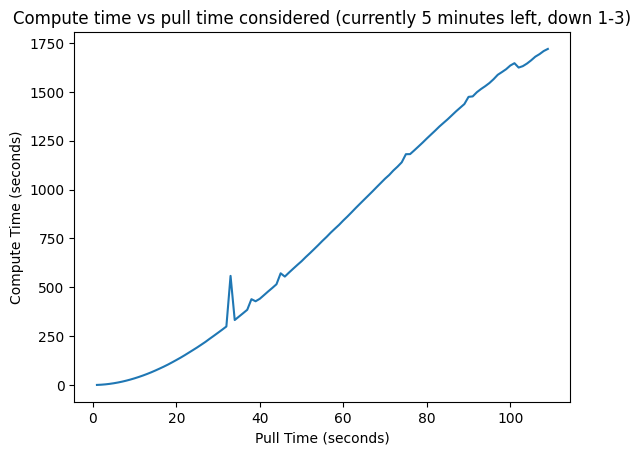

In [5]:
# Plot compute time for each decision
plt.plot(decisions_df["pull_time"], decisions_df["compute_time"])
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Compute Time (seconds)")
plt.title("Compute time vs pull time considered (currently 5 minutes left, down 1-3)")

## 6 minutes left, down 1-3

'Pull the goalie after 2 seconds for the highest probability of success'

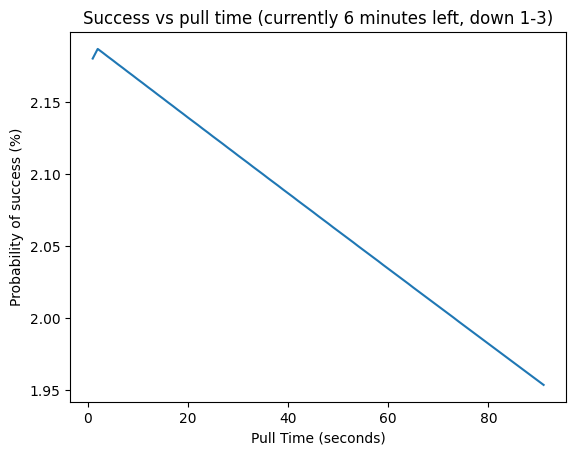

In [14]:
decisions_df = pkl.load(
    open(
        "results/partial_results_6min_1to3_brute_force.pkl",
        "rb",
    )
)

# Plot pull time vs probability of success
plt.plot(decisions_df["pull_time"], decisions_df["prob_success"])
# label x axis
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Probability of success (%)")
plt.title("Success vs pull time (currently 6 minutes left, down 1-3)")

# Find the pull time with the highest probability
max_prob = decisions_df["prob_success"].max()
best_pull_times = decisions_df[decisions_df["prob_success"] == max_prob][
    "pull_time"
].values[0]
display(
    f"Pull the goalie after {best_pull_times} seconds for the highest probability of success"
)

## 5 minutes left, down 1-2

'Pull the goalie after 2 seconds for the highest probability of success'

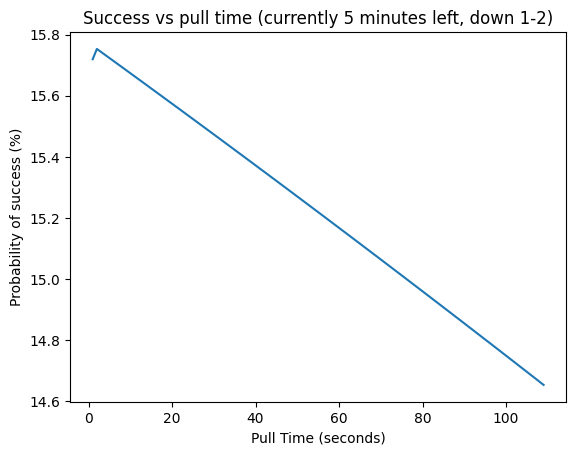

In [15]:
decisions_df = pkl.load(
    open(
        "results/partial_results_5min_1to2_brute_force.pkl",
        "rb",
    )
)

# Plot pull time vs probability of success
plt.plot(decisions_df["pull_time"], decisions_df["prob_success"])
# label x axis
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Probability of success (%)")
plt.title("Success vs pull time (currently 5 minutes left, down 1-2)")

# Find the pull time with the highest probability
max_prob = decisions_df["prob_success"].max()
best_pull_times = decisions_df[decisions_df["prob_success"] == max_prob][
    "pull_time"
].values[0]
display(
    f"Pull the goalie after {best_pull_times} seconds for the highest probability of success"
)

## Varying $p_{a2}$ (our probability of scoring after pulling the goalie)

Computed with all other probabilities coming from our NHL dataset

/var/folders/nn/pb4b1kzx12vbp6sgl69b77rw0000gp/T/ipykernel_46760/1983998730.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r*" (-> color='r'). The keyword argument will take precedence.
  plt.plot(pull_time, max_prob, "r*", markersize= 10, color = opt_color)


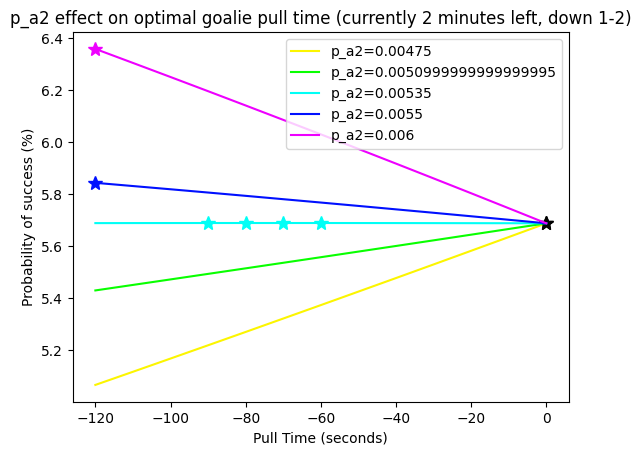

In [16]:
decisions_df = pkl.load(
    open(
        "results/down1to2_2minleft_vary-pa2.pkl",
        "rb",
    )
)

# Make the time that the game ends 0
decisions_df["pull_time"] = decisions_df["pull_time"] - 120

p_a2_options = decisions_df["p_a2"].unique()

# Create a color pallete with a different color per option
palette = sns.color_palette("hsv", len(p_a2_options))
color_map = dict(zip(p_a2_options, palette))

for p_a2 in p_a2_options:
    decisions_df_p_a2 = decisions_df[decisions_df["p_a2"] == p_a2]
    # Plot pull time vs probability of success
    plt.plot(decisions_df_p_a2["pull_time"], decisions_df_p_a2["prob_success"], label=f"p_a2={p_a2}", color=color_map[p_a2])

    # Find point with highest probability of success
    max_prob = decisions_df_p_a2["prob_success"].max()
    best_pull_times = decisions_df_p_a2[decisions_df_p_a2["prob_success"] == max_prob][
        "pull_time"
    ]
    for pull_time in best_pull_times:
        if pull_time == 0:
            opt_color = "black" # Multiple lines will have optimal point here
        else:
            opt_color = color_map[p_a2]
        plt.plot(pull_time, max_prob, "r*", markersize= 10, color = opt_color)


# label x axis
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Probability of success (%)")
plt.title("p_a2 effect on optimal goalie pull time (currently 2 minutes left, down 1-2)")
plt.legend()

/var/folders/nn/pb4b1kzx12vbp6sgl69b77rw0000gp/T/ipykernel_46760/4172533319.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r*" (-> color='r'). The keyword argument will take precedence.
  plt.plot(pull_time, max_prob, "r*", markersize= 10, color = opt_color)


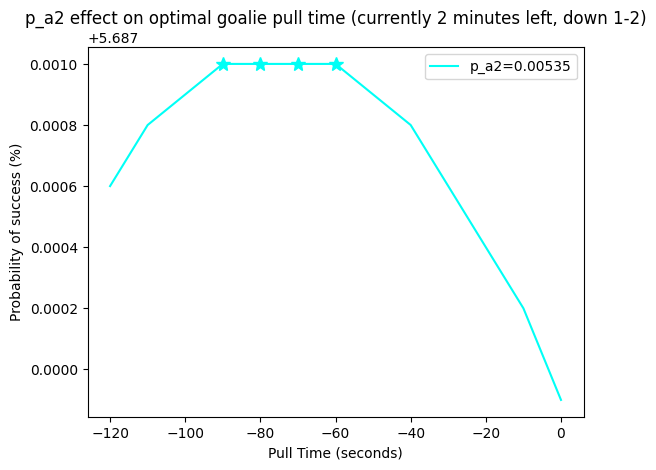

In [17]:
decisions_df = pkl.load(
    open(
        "results/down1to2_2minleft_vary-pa2.pkl",
        "rb",
    )
)

# Make the time that the game ends 0
decisions_df["pull_time"] = decisions_df["pull_time"] - 120

p_a2 = 5.35 * 10 ** -3
decisions_df_p_a2 = decisions_df[decisions_df["p_a2"] == p_a2]
# Plot pull time vs probability of success
plt.plot(
    decisions_df_p_a2["pull_time"],
    decisions_df_p_a2["prob_success"],
    label=f"p_a2={p_a2}",
    color=color_map[p_a2],
)

# Find point(s) with highest probability of success
max_prob = decisions_df_p_a2["prob_success"].max()
best_pull_times = decisions_df_p_a2[decisions_df_p_a2["prob_success"] == max_prob][
"pull_time"
]
for pull_time in best_pull_times:
    if pull_time == 0:
        opt_color = "black" # Multiple lines will have optimal point here
    else:
        opt_color = color_map[p_a2]
    plt.plot(pull_time, max_prob, "r*", markersize= 10, color = opt_color)

# label x axis
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Probability of success (%)")
plt.title(
    "p_a2 effect on optimal goalie pull time (currently 2 minutes left, down 1-2)"
)
plt.legend()

## Varying minutes left in the game

Computed with $p_{a2} = 5.35 \times 10^{-3}$ and all other probabilities from the NHL dataset

/var/folders/nn/pb4b1kzx12vbp6sgl69b77rw0000gp/T/ipykernel_46760/691042092.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r*" (-> color='r'). The keyword argument will take precedence.
  plt.plot(pull_time, max_prob, "r*", markersize=10, color=opt_color)


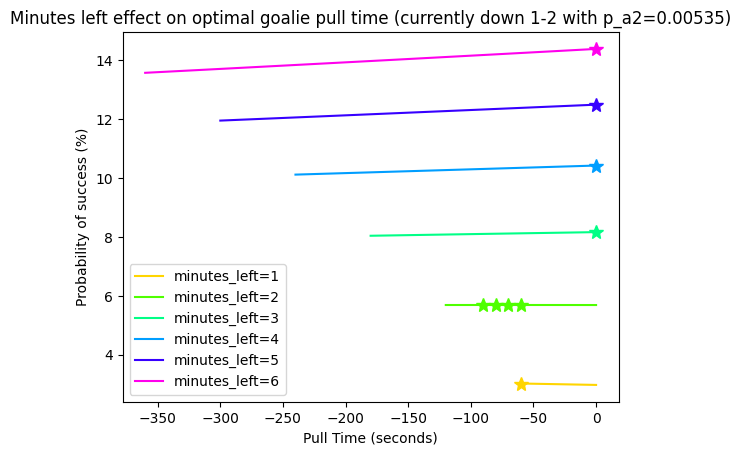

In [24]:
decisions_df = pkl.load(
    open(
        "results/down1to2_vary-minutesleft.pkl",
        "rb",
    )
)

# Make the time that the game ends 0
decisions_df["pull_time"] = decisions_df["pull_time"] - decisions_df["minutes_left"] * 60

mins_left_options = decisions_df["minutes_left"].unique()

# Create a color pallete with a different color per option
palette = sns.color_palette("hsv", len(mins_left_options))
color_map = dict(zip(mins_left_options, palette))


for mins_left in mins_left_options:
    decisions_df_mins_left = decisions_df[decisions_df["minutes_left"] == mins_left]
    # Plot pull time vs probability of success
    plt.plot(
        decisions_df_mins_left["pull_time"],
        decisions_df_mins_left["prob_success"],
        label=f"minutes_left={mins_left}",
        color=color_map[mins_left],
    )

    # Find point(s) with highest probability of success
    max_prob = decisions_df_mins_left["prob_success"].max()
    best_pull_times = decisions_df_mins_left[
        decisions_df_mins_left["prob_success"] == max_prob
    ]["pull_time"]
    for pull_time in best_pull_times:
        opt_color = color_map[mins_left]
        plt.plot(pull_time, max_prob, "r*", markersize=10, color=opt_color)

# label x axis
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Probability of success (%)")
plt.title(
    "Minutes left effect on optimal goalie pull time (currently down 1-2 with p_a2=0.00535)"
)
plt.legend()

## Varying the starting score

Currently down 1 to x with p_a2 = 0.00535 and 2 minutes left in the game

/var/folders/nn/pb4b1kzx12vbp6sgl69b77rw0000gp/T/ipykernel_46760/295864508.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r*" (-> color='r'). The keyword argument will take precedence.
  plt.plot(pull_time, max_prob, "r*", markersize=10, color=opt_color)


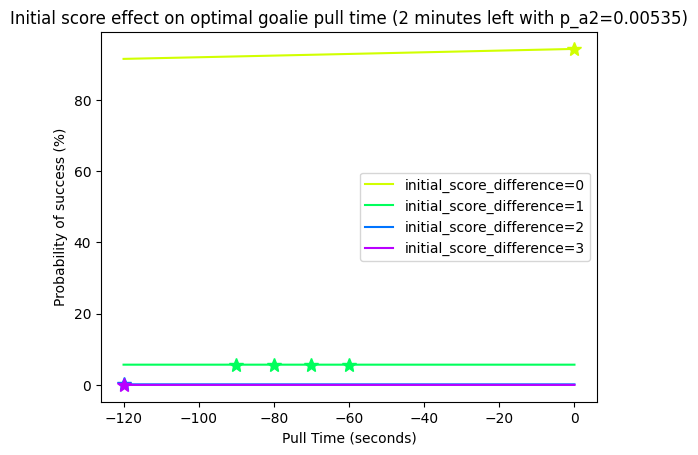

In [32]:
decisions_df = pkl.load(
    open(
        "results/2minleft_vary_score.pkl",
        "rb",
    )
)

# Make the time that the game ends 0
decisions_df["pull_time"] = (
    decisions_df["pull_time"] - 2 * 60
)
decisions_df["init_diff"] = decisions_df["b_0"] - 1

init_diff_options = decisions_df["init_diff"].unique()

# Create a color pallete with a different color per option
palette = sns.color_palette("hsv", len(init_diff_options))
color_map = dict(zip(init_diff_options, palette))


for init_diff in init_diff_options:
    decisions_df_init_diff = decisions_df[decisions_df["init_diff"] == init_diff]
    # Plot pull time vs probability of success
    plt.plot(
        decisions_df_init_diff["pull_time"],
        decisions_df_init_diff["prob_success"],
        label=f"initial_score_difference={init_diff}",
        color=color_map[init_diff],
    )

    # Find point(s) with highest probability of success
    max_prob = decisions_df_init_diff["prob_success"].max()
    best_pull_times = decisions_df_init_diff[
        decisions_df_init_diff["prob_success"] == max_prob
    ]["pull_time"]
    for pull_time in best_pull_times:
        opt_color = color_map[init_diff]
        plt.plot(pull_time, max_prob, "r*", markersize=10, color=opt_color)

# label x axis
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Probability of success (%)")
plt.title(
    "Initial score effect on optimal goalie pull time (2 minutes left with p_a2=0.00535)"
)
plt.legend()

## Probabilities calculated from NHL data

Down 2-1. Various number of minutes left in the game.

/var/folders/nn/pb4b1kzx12vbp6sgl69b77rw0000gp/T/ipykernel_46760/2504873691.py:65: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r*" (-> color='r'). The keyword argument will take precedence.
  plt.plot(pull_time, max_prob, "r*", markersize=10, color=opt_color)


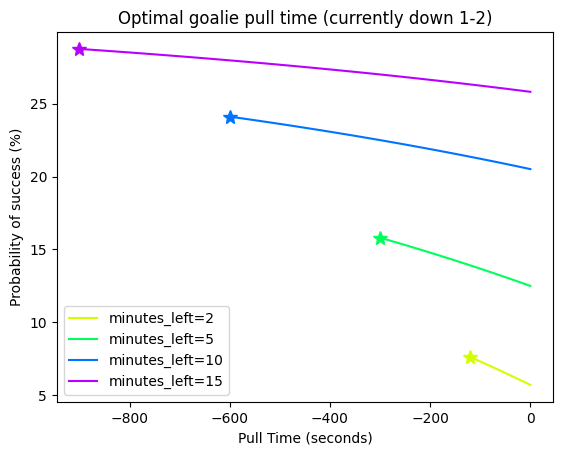

In [45]:
decisions_df_2 = pkl.load(
    open(
        "results/2minleft_1to2.pkl",
        "rb",
    )
)
decisions_df_2["minutes_left"] = 2

decisions_df_5 = pkl.load(
    open(
        "results/5minleft_1to2.pkl",
        "rb",
    )
)
decisions_df_5["minutes_left"] = 5


decisions_df_10 = pkl.load(
    open(
        "results/10minleft_1to2.pkl",
        "rb",
    )
)
decisions_df_10["minutes_left"] = 10

decisions_df_15 = pkl.load(
    open(
        "results/15minleft_1to2.pkl",
        "rb",
    )
)
decisions_df_15["minutes_left"] = 15

decisions_df = pd.concat([decisions_df_2, decisions_df_5, decisions_df_10, decisions_df_15], ignore_index=True)

# Make the time that the game ends 0
decisions_df["pull_time"] = (
    decisions_df["pull_time"] - decisions_df["minutes_left"] * 60
)

mins_left_options = decisions_df["minutes_left"].unique()

# Create a color pallete with a different color per option
palette = sns.color_palette("hsv", len(mins_left_options))
color_map = dict(zip(mins_left_options, palette))


for mins_left in mins_left_options:
    decisions_df_mins_left = decisions_df[decisions_df["minutes_left"] == mins_left]
    # Plot pull time vs probability of success
    plt.plot(
        decisions_df_mins_left["pull_time"],
        decisions_df_mins_left["prob_success"],
        label=f"minutes_left={mins_left}",
        color=color_map[mins_left],
    )

    # Find point(s) with highest probability of success
    max_prob = decisions_df_mins_left["prob_success"].max()
    best_pull_times = decisions_df_mins_left[
        decisions_df_mins_left["prob_success"] == max_prob
    ]["pull_time"]
    for pull_time in best_pull_times:
        opt_color = color_map[mins_left]
        plt.plot(pull_time, max_prob, "r*", markersize=10, color=opt_color)

# label x axis
plt.xlabel("Pull Time (seconds)")
plt.ylabel("Probability of success (%)")
plt.title(
    "Optimal goalie pull time (currently down 1-2)"
)
plt.legend()